<a href="https://colab.research.google.com/github/2312058/Joy-s/blob/main/TitanicPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
train_df = pd.read_csv("Titanic-Dataset.csv")
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


train_df = pd.read_csv("Titanic-Dataset.csv")


print("Columns in the dataset:", train_df.columns)


train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
print("Features available in the dataset:")
print(train_df[features].head())


X = train_df[features]
y = train_df['Survived']

print("Missing values in features (X):")
print(X.isnull().sum())

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Columns in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Features available in the dataset:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         2
1       1    1  38.0      1      0  71.2833         0
2       3    1  26.0      0      0   7.9250         2
3       1    1  35.0      1      0  53.1000         2
4       3    0  35.0      0      0   8.0500         2
Missing values in features (X):
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Validation Accuracy: 0.8156


Validation Accuracy: 0.8156


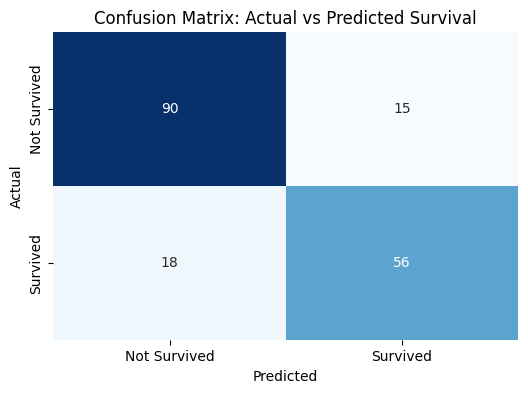

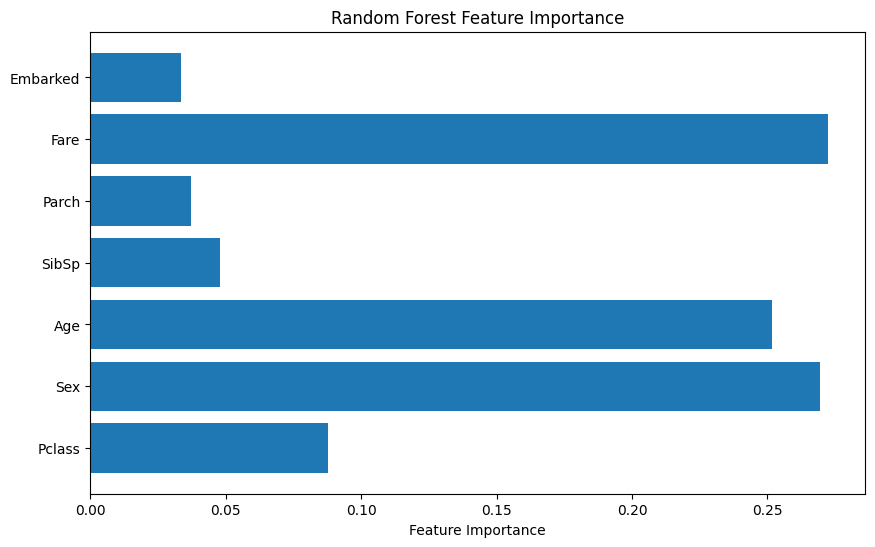

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

train_df = pd.read_csv("Titanic-Dataset.csv")

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())  # Fill missing Age with median
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])  # Fill missing Embarked with mode
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})  # Convert 'male' to 0, 'female' to 1
train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Convert 'C', 'Q', 'S' to 0, 1, 2


features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix: Actual vs Predicted Survival")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


importances = model.feature_importances_
indices = [i for i in range(len(importances))]

plt.figure(figsize=(10, 6))
plt.barh(indices, importances, align="center")
plt.yticks(indices, features)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

